# <font color='#eb3483'>**Linear Regression with scikit-learn**</font>

In this notebook, we are going to train a simple linear regression model using the [`scikit-learn`](https://scikit-learn.org) library. Linear regression is a *supervised learning* technique that is suitable for a *continuous/numerical* outcome variable.  

In this notebook, we'll build a linear regression model to predict 'Salary' using 'Experience Years' as the predictor variable.

## Understanding the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Import data
salary = pd.read_csv("/Users/mollyrudisill/ix24_mollyr/ix_datascience-main/classwork/data/Experience-Salary.csv")

Now, let's check the structure of the dataset.

In [3]:
# Let's check the columns
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [4]:
# Let's look at some statistical information about the dataframe.
salary.describe()

,exp(in months),salary(in thousands)
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


# Visualising Data Using Plot

<Axes: xlabel='exp(in months)', ylabel='salary(in thousands)'>

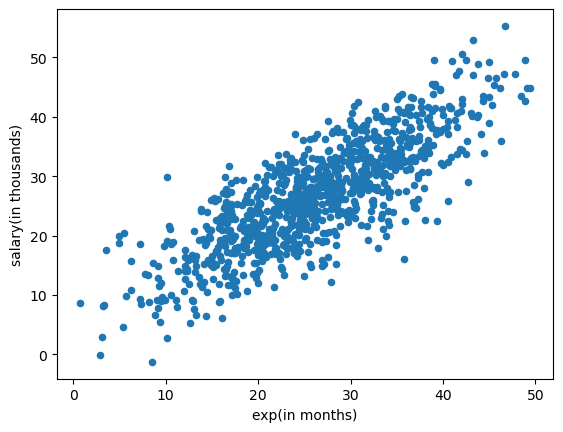

In [5]:
# Visualise the relationship between the features and the response using scatterplots
salary.plot(x="exp(in months)", y="salary(in thousands)", kind="scatter")

# Performing Simple Linear Regression

We are applying Linear Regression because:

* We have single dependent and single independent variable.
* We can see the linearity in the dataset.

Formula: y = b0 + b1 * X1.

As per our case Regression Equation : Salary = b0 + b1 * Experience.

We could also say Salary = coef_ + intercept_ * Experience.

## <font color='#eb3483'> Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows:

## <font color='#eb3483'> Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [6]:
# Putting feature variable to X
X = salary[['exp(in months)']]

# Print the first 5 rows
X.head(5)

,exp(in months)
0,18.290293
1,17.023407
2,26.343613
3,19.105834
4,27.742516


In [7]:
# Putting response variable to y
y = salary[['salary(in thousands)']]

# Print the first 5 rows
y.head(5)

,salary(in thousands)
0,16.521825
1,11.666234
2,23.167255
3,20.877145
4,23.166236


## <font color='#eb3483'> Splitting Data into Training and Testing Sets

In [8]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [9]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set has', X_train.shape[0], 'rows')
print('Test set has', X_test.shape[0], 'rows')

Training set has 800 rows
Test set has 200 rows


In [10]:
train_test_split
#Press Tab+Shift to read the documentation

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1), (200, 1), (800, 1), (200, 1))

## <font color='#eb3483'> Performing Linear Regression
The algorithms for linear regression are in the `linear_model` submodule of `sklearn`. Let's import the `LinearRegression` class and create (instantiate) an *estimator* object. Note that this is the standard procedure for any machine learning algo available in `sklearn`.

In [12]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as model(Creating LinearRegression Object)
model = LinearRegression()

We train the model (i.e. estimate its parameters) on the training data with the `fit` method. The `fit` method follows the same structure for pretty much every model in scikit-learn. We pass as arguments the features `X` and outcome variable `y`. The find out more, recall that you can type `?model.fit`.

Let's fit a simple linear model with Salary as the outcome and the Experience Years as the feature:

In [13]:
# Fit the model using model.fit()
model.fit(X_train, y_train)

LinearRegression()

## <font color='#eb3483'> Coefficients Calculation

In [14]:
#check intercept
model.intercept_

array([4.9111771])

In [15]:
#check coef
model.coef_

array([[0.83360799]])

In [16]:
print('The estimated regression function is:\n Salary =', np.round(model.intercept_,2), '+', np.round(model.coef_[0],2), '* Experience Years')

The estimated regression function is:
 Salary = [4.91] + [0.83] * Experience Years


**What does this mean?**

Now, let's use this equation to predict our sales.

## <font color='#eb3483'> Model Evaluation

In [17]:
# Making predictions on the testing set
y_pred = model.predict(X_test)

In [18]:
type(y_pred)

numpy.ndarray

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 27.65026873284229
R^2 Score: 0.6208258933084712
Mean Absolute Error: 4.1621356133144705


**What does this mean?**

Let's visualize the actual salary against the predicted salary. If the model was perfect, the predicted values would equal the observed values, and all the points would lie on the diagonal line through the origin:


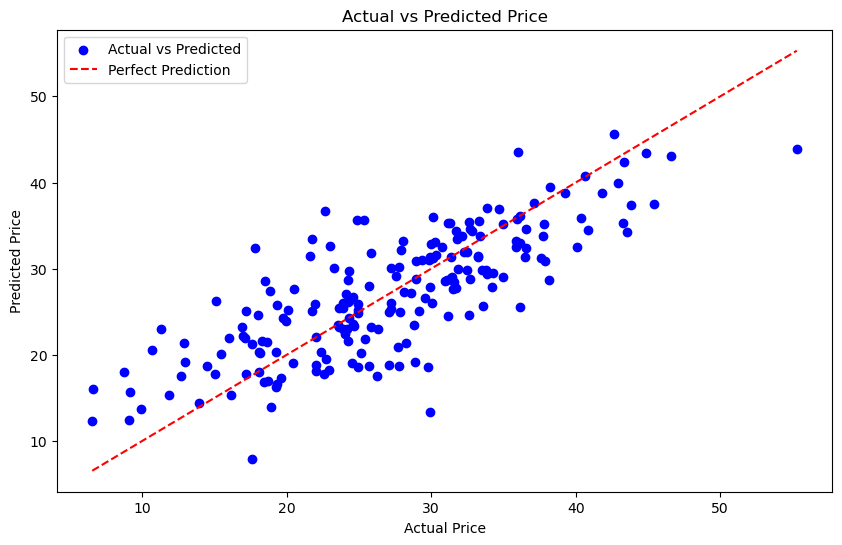

In [20]:
# Plot actual vs predicted salaries
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()                    # Y-label

## <font color='#eb3483'> Cross Validation </font>

cross-validation is a valuable technique for evaluating the performance of a machine learning model, especially when the dataset is small or when you want to get a more reliable estimate of the model's performance.

To do cross validation, we simply split the data into *K* folds, and for each fold, we train the model on the data from the *K*-1 remaining folds and evaluate on the one that was not included in the training set. That way, we get out-of-sample predictions and errors for every data point, so we don't rely on a single test set.

The `cross_val_score` function in `scikit-learn` computes your choice of evaluation metric for each fold. To use this function, we first need to see what "scoring methods" are available:


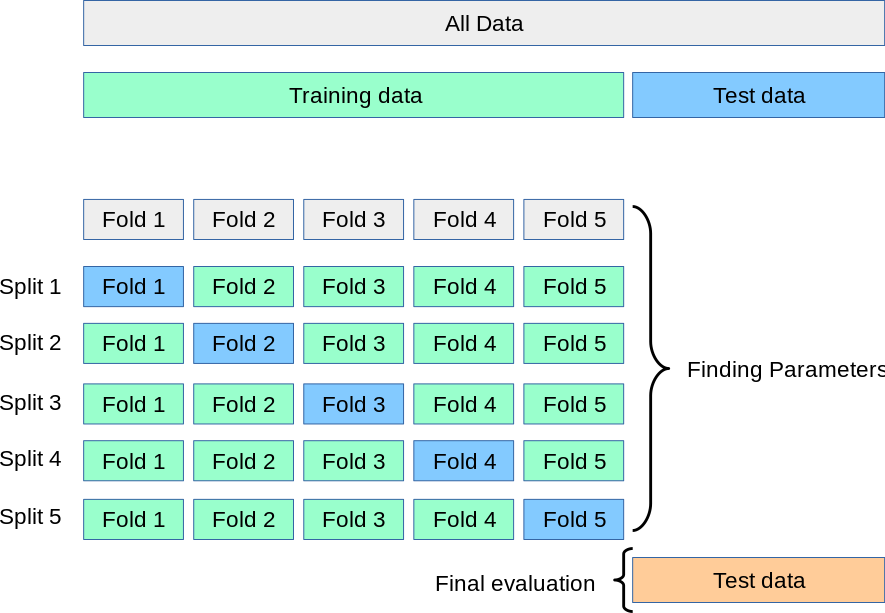

In [21]:
from sklearn.model_selection import cross_val_score

# Create a linear regression model
model = LinearRegression()

# Perform cross-validation with R-squared as the scoring metric
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the R-squared scores for each fold
print("R-squared scores:", scores)

# Print the mean R-squared score
print("Mean R-squared score:", scores.mean())

R-squared scores: [0.69765424 0.63395401 0.64115488 0.64480898 0.65062309]
Mean R-squared score: 0.6536390400642731


Note that running this function again will produce different results since the data are split into folds randomly each time the function is called.

If we want to get more information about each split, we can use the `cross_validate` function instead. It also accepts multiple scoring functions/evaluation metrics. Think of `cross_val_score` as the simplified version of `cross_validate`...

In [22]:
from sklearn.model_selection import cross_validate

# Create a linear regression model
model = LinearRegression()

# Perform cross-validation with R-squared as one of the scoring metrics
scoring = ['r2', 'neg_mean_squared_error', 'explained_variance']
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

# Print the R-squared scores for each fold
print("R-squared scores:", cv_results['test_r2'])

# Print the mean R-squared score
print("Mean R-squared score:", cv_results['test_r2'].mean())

# Print other scores and metrics
print("Negative Mean Squared Error:", cv_results['test_neg_mean_squared_error'])
print("Explained Variance Score:", cv_results['test_explained_variance'])

R-squared scores: [0.69765424 0.63395401 0.64115488 0.64480898 0.65062309]
Mean R-squared score: 0.6536390400642731
Negative Mean Squared Error: [-25.50712743 -28.25615372 -29.41324984 -24.82231737 -26.30549042]
Explained Variance Score: [0.69787982 0.63466939 0.6443348  0.65190907 0.65489491]


In [23]:
cv_results

{'fit_time': array([0.00132513, 0.00295615, 0.00087619, 0.00356102, 0.00206304]),
 'score_time': array([0.00145698, 0.00268483, 0.00121498, 0.00349474, 0.00505209]),
 'test_r2': array([0.69765424, 0.63395401, 0.64115488, 0.64480898, 0.65062309]),
 'test_neg_mean_squared_error': array([-25.50712743, -28.25615372, -29.41324984, -24.82231737,
        -26.30549042]),
 'test_explained_variance': array([0.69787982, 0.63466939, 0.6443348 , 0.65190907, 0.65489491])}

We get results for each one of the folds:
- fit time = how long it took to train the model
- score time = how long it took to make predictions and compute the score
- test and train scores are given for each one of the scoring functions